In [1]:
import numpy as np
import time

import qiskit
import qiskit.quantum_info as qi
# Tomography functions
from qiskit.providers.aer.noise import NoiseModel
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.quantum_info import DensityMatrix

from qiskit import *
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.visualization import *

# Loading your IBM Quantum account(s)
IBMQ.save_account(
    '280beccbee94456a161a6cbc217e1366bc278bf60e22bd30281fa0ca5bec6e50897278ef818f3c53f6700e04b9ed32ea364195044413b7e02836a79d886b03d9',
    overwrite=True)
provider = IBMQ.load_account()

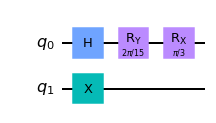

In [2]:
# Bell state density matrix
bell = QuantumCircuit(2)
bell.h(0)
bell.ry(np.pi/7.5,0)
bell.rx(np.pi/3,0)
bell.x(1)

#bell.cx(0, 1)
bell.draw(output='mpl');

In [3]:
state_vector = qi.Statevector.from_instruction(bell)
state_vector.draw('latex')

<IPython.core.display.Latex object>

In [4]:
DensityMatrix(state_vector).draw('latex')

<IPython.core.display.Latex object>

D:\BarIlan\Qiskit\lib\site-packages\qiskit\ignis\verification\tomography\basis\circuits.py:468: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  prep += circuit
D:\BarIlan\Qiskit\lib\site-packages\qiskit\circuit\quantumcircuit.py:942: DeprecationWarning: The QuantumCircuit.extend() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  return self.extend(rhs)
D:\BarIlan\Qiskit\lib\site-packages\qiskit\ignis\verification\tomography\basis\circuits.py:478: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  circ = prep + meas
D:\BarIlan\Qiskit\lib\site-packages\qiskit\circuit\quantumcir

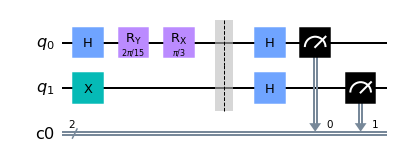

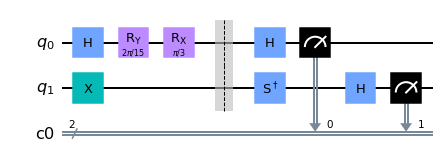

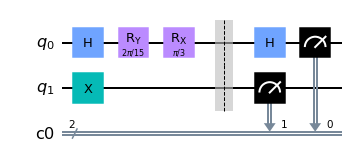

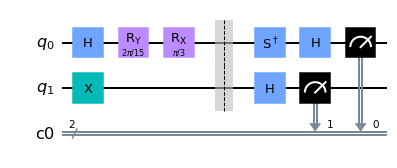

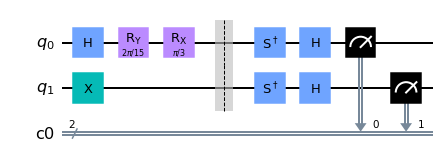

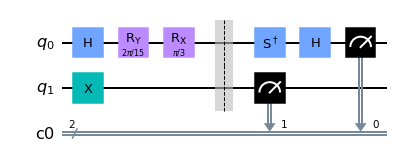

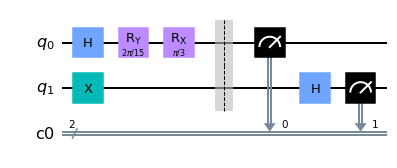

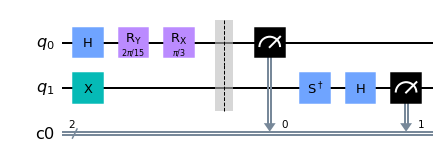

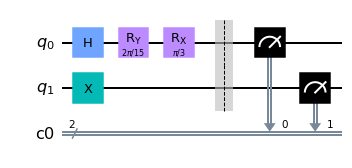

In [5]:
den_circuits = state_tomography_circuits(bell, bell.qubits);
drawings = []
for i in range(len(den_circuits)):
    drawings.append(den_circuits[i].draw(output='mpl'))

In [6]:
from importlib import reload
from Tomography import utility
#reload(utility)

backend = provider.get_backend('ibmq_manila')
noise_model = NoiseModel.from_backend(backend)
coupling_map = backend.configuration().coupling_map
basis_gates = noise_model.basis_gates


job = qiskit.execute(den_circuits, Aer.get_backend('qasm_simulator'),shots=5000)
print(job.job_id())

D:\BarIlan\Qiskit\lib\site-packages\qiskit\aqua\__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')
ibmqfactory.load_account:WARNING:2021-09-18 15:11:53,654: Credentials are already in use. The existing account in the session will be replaced.


2896dc70-b671-499f-b17c-575f661e4454


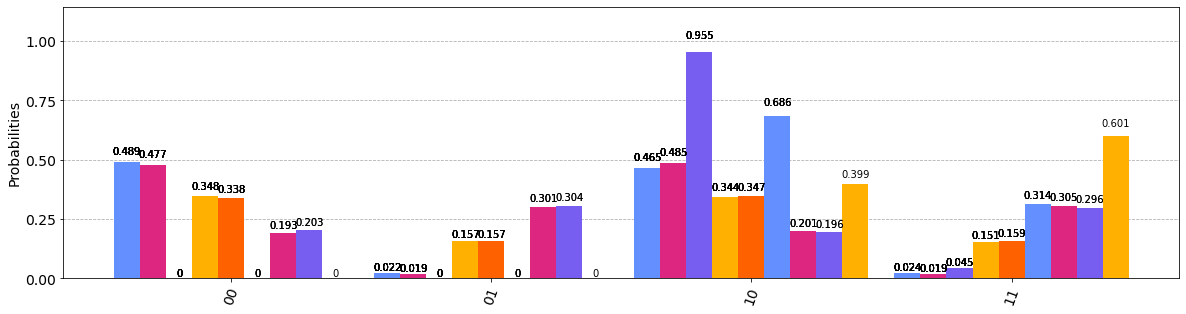

In [7]:
plot_histogram(job.result().get_counts(), figsize=(20, 5));

In [8]:
from Tomography import tomography_func

tomo_fitter_bell = StateTomographyFitter(job.result(), den_circuits).fit(method='lstsq')
#tomo_fitter_bell = tomography_func.tomography_2q(job.result().get_counts(), 5000)
matrix = DensityMatrix(tomo_fitter_bell)
matrix.draw('latex')

<IPython.core.display.Latex object>

In [33]:
fidelity = qi.state_fidelity(matrix, state_vector)
purity = qi.purity(matrix)
print(fidelity)
print(purity)

0.9998578274920814
(1+0j)


In [49]:
from Tomography import tomography
reload(tomography)
rhoExp = tomography.get_density_matrix(job.result().get_counts())
DensityMatrix(rhoExp).draw('latex')

[1.0, 0.006666666666666668, -0.0007999999999999998, -1.0, 0.9137333333333334, 0.0256, -0.0084, -0.91, 0.3748, -0.0024, -0.0064, -0.372, -0.20520000000000002, -0.0048, -0.0016, 0.2028]


<IPython.core.display.Latex object>

In [50]:
fidelity = tomography.calc_fidelity(matrix, state_vector)
purity = tomography.calc_purity(matrix)
print(fidelity)
print(purity)


0.9997156751971848
(1+0j)
